In [1]:
from imports import *

2023-02-26 14:29:35.713073: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 14:29:36.385700: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-26 14:29:37.698359: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/siddharth/miniconda3/lib/python3.8/site-packages/cv2/../../lib64:
2023-02-26 14:29:37.698792: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugi

Using tensorflow's CNN and opencv to classify images
Steps of implimenting it as follows :
Load the data from disk or get the live feed from the camera
Find the face in the image
Crop the face from the image
Resize the image and feed it to the CNN
Get the output from the CNN
Match the output with the labels and display the name of the person


In [3]:
class ImageClassifier:
    # path can be either path to folder or inbuilt dataset
    def __init__(self, path=None):
        self.path = path
        self.data, self.labels = self.imagegathering()
        self.model = self.createmodel()
        self.model.fit(self.data, self.labels, epochs=1, batch_size=32, validation_split=0.2)
        self.model.predict(self.data)
    
    def imagegathering(self):
        if self.path is not None:
            data = []
            for i in os.listdir(self.path):
                data.append(i)
            return data
        else:
            lfw_people = fetch_lfw_people(min_faces_per_person=5, resize=0.4,data_home='/home/siddharth/vscode/other_projects/vigilant-detection/datafiles', download_if_missing=True)
            faces = lfw_people.images
            labels = lfw_people.target
            faces = faces.reshape(faces.shape[0], 100, 100, 1)
            faces = faces / 255.0 # scaling the pixel values to [0, 1]
            return faces, labels

    # creating a function which will be used to create a model for image classification
    def createmodel(self):
        model = tf.keras.models.Sequential()
        base_model = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(100, 100, 1))
        base_model.trainable = False
        model.add(base_model)
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(128, activation='relu'))
        model.add(tf.keras.layers.Dense(7, activation='softmax'))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.summary()
        model.save('model.h5')
        return model


classifier = ImageClassifier(path=None) # using inbuilt dataset


ValueError: cannot reshape array of size 11072250 into shape (5985,100,100,1)

Total dataset size:
n_samples: 5985
n_features: 5550
n_classes: 423


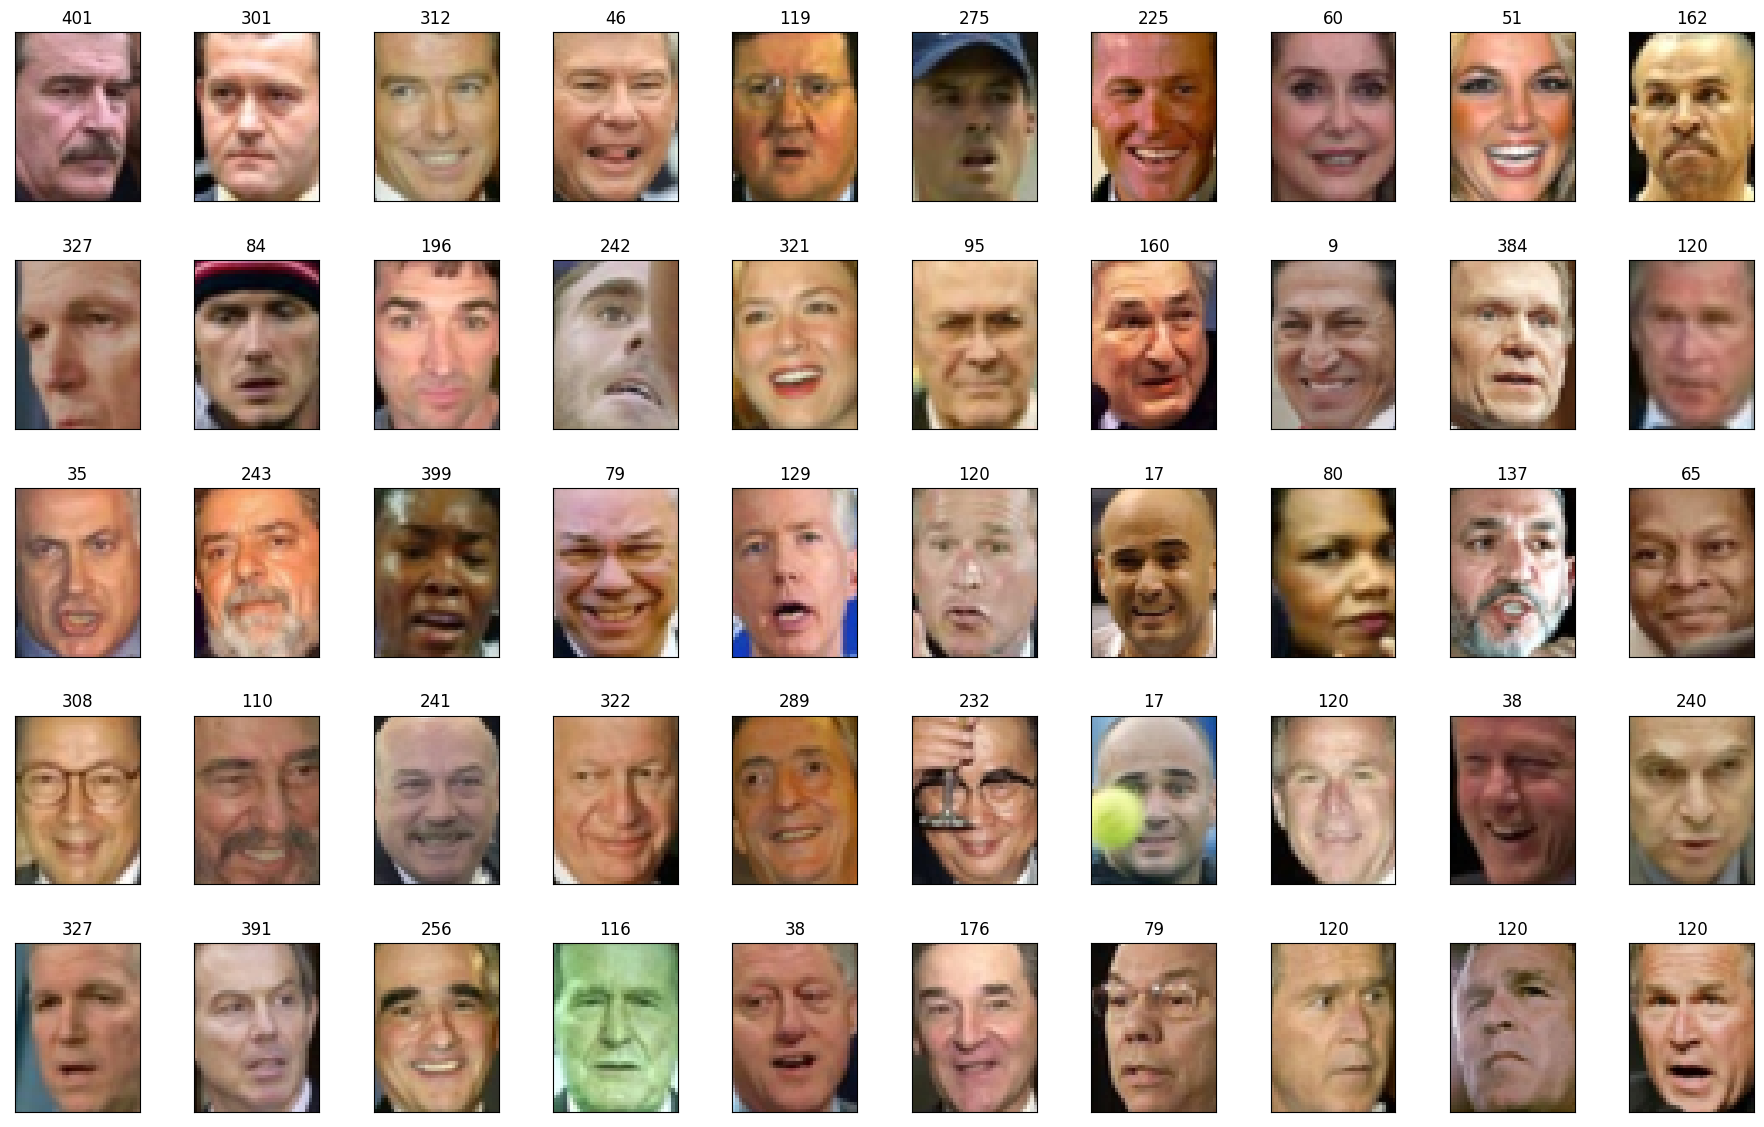

In [5]:
lfw_people = fetch_lfw_people(min_faces_per_person=5, resize=0.4,data_home='/home/siddharth/vscode/other_projects/vigilant-detection/datafiles', download_if_missing=True, color=True)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w, c = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# plot 50 random images from the dataset
def plot_gallery(images, titles, h, w, n_row=5, n_col=10):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w, c)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

plot_gallery(X, y, h, w)
